# Analysis of GENIE3 relationships
Océane Carpentier

In [1]:
library(ggplot2)
library(data.table)
theme_set(theme_bw(base_size = 16))

```cypher
MATCH ()-[r:GENIE3_INFERENCE_SCORE]->()
RETURN avg(r.score),min(r.score),max(r.score);
```

| avg(r.score)         | min(r.score)          | max(r.score)       |
|----------------------|-----------------------|--------------------|
| 4.562289232463103E-4 | -3.86979365452323E-11 | 0.0698317146692032 |

```cypher
MATCH (m:miRNA)-[r:GENIE3_INFERENCE_SCORE]->(g:Gene)
RETURN g.biotype,count(DISTINCT g),avg(r.score),min(r.score),max(r.score);
```

| g.biotype | count(DISTINCT g) | avg(r.score)          | min(r.score)            | max(r.score)       |
|-----------|-------------------|-----------------------|-------------------------|--------------------|
| "lncRNA"  | 16945             | 4.6013489813769026E-4 | -3.6838286280609195E-11 | 0.0647865547002612 |
| "mRNA"    | 15495             | 4.495399982963199E-4  | -8.705459489106079E-12  | 0.0698317146692032 |
| "TUCp"    | 1423              | 4.8574145719704193E-4 | -3.86979365452323E-11   | 0.0628772634910902 |
| "noORF"   | 66                | 4.5801526717555147E-4 | -1.63848236666104E-13   | 0.0433546367920228 |



Run this lines before continue :

```bash
dir=/home/ocarpentier/work/result/cypher
cypher-shell -u neo4j -p multireg "MATCH (m:miRNA)-[r:GENIE3_INFERENCE_SCORE]->(g:Gene) RETURN m.miRNA AS RegulatoryGene,g.name AS TargetGene,r.score AS Weight ,g.biotype AS Biotype,g.transcript AS NbTranscripts" > $dir/score_genie3_biotype_transcript.csv
```

In [2]:
setwd("/home/ocarpentier")
GENIE3 <- data.table::fread(file = "work/result/cypher/score_genie3_biotype_transcript.csv",header=TRUE, sep=",",data.table=FALSE)

In [3]:
head(GENIE3)

RegulatoryGene TargetGene       Weight       Biotype NbTranscripts
1 NULL           LOC_000000221641 1.472595e-05 lncRNA  1            
2 NULL           LOC_000000221589 4.597131e-08 lncRNA  1            
3 NULL           LOC_000000221554 5.220471e-06 mRNA    1            
4 NULL           LOC_000000221530 8.367267e-05 mRNA    1            
5 NULL           LOC_000000221498 1.391933e-05 lncRNA  1            
6 NULL           LOC_000000221411 2.605445e-05 TUCp    1

In [4]:
dim(GENIE3)

[1] 74368367        5

Distribution score GENIE3 :

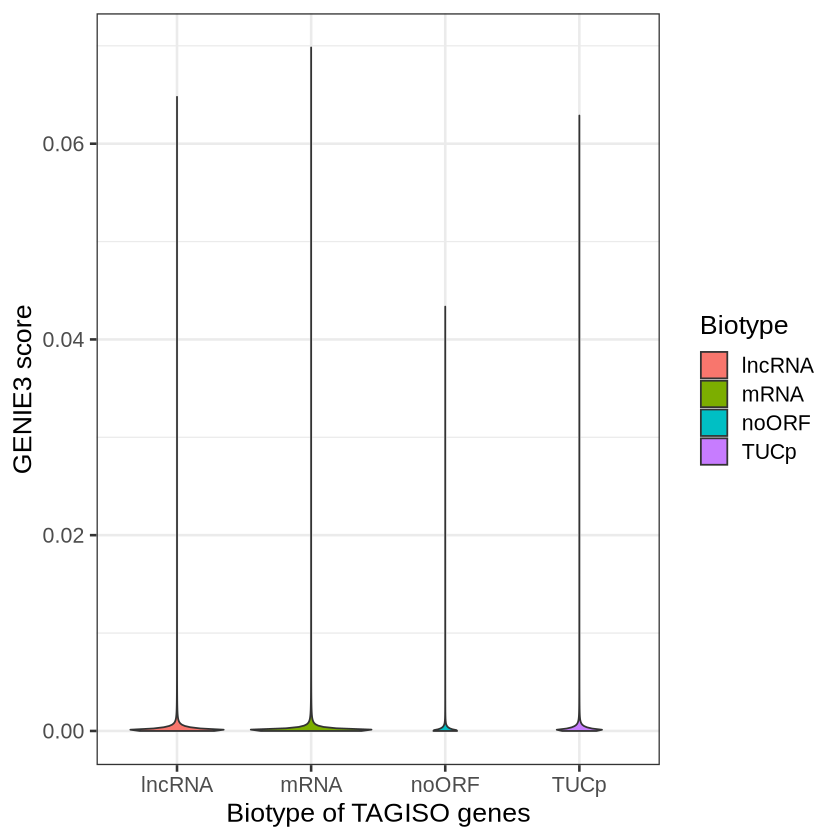

In [5]:
ggplot(GENIE3, aes(x = Biotype, y = Weight, fill = Biotype)) +
  geom_violin() +
  labs(x = "Biotype of TAGISO genes",
       y = "GENIE3 score")

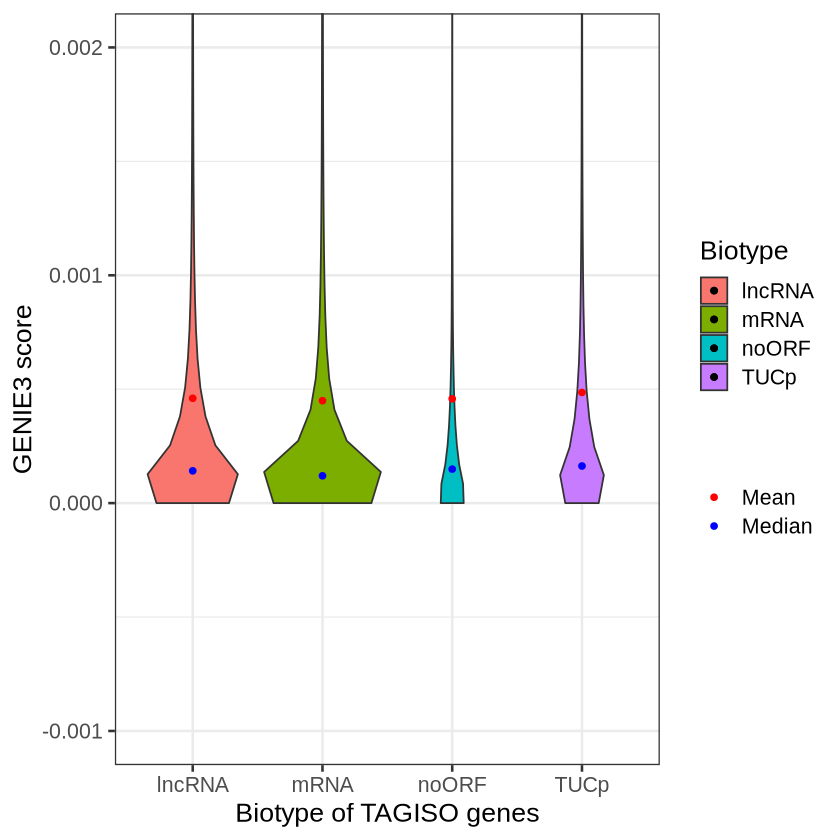

In [6]:
ggplot(GENIE3, aes(x = Biotype, y = Weight, fill = Biotype)) +
  geom_violin() +
  labs(x = "Biotype of TAGISO genes",
       y = "GENIE3 score") + coord_cartesian(ylim = c(-0.001,0.002)) +
stat_summary(fun = "mean",geom = "point", aes(color = "Mean")) +
stat_summary(fun = "median",geom = "point",aes(color = "Median")) +
scale_colour_manual(values = c("red", "blue"), name = "")

Rank of GENIE3 score :

In [7]:
GENIE3_sorted = GENIE3[order(-GENIE3$Weight), ]
GENIE3_sorted$Rank = 1:nrow(GENIE3_sorted)
head(GENIE3_sorted)

RegulatoryGene TargetGene       Weight     Biotype NbTranscripts Rank
74327746 NULL           LOC_000000009739 0.06983171 mRNA    15            1   
74329504 NULL           LOC_000000006644 0.06920978 mRNA    21            2   
74321385 NULL           LOC_000000026738 0.06872115 mRNA    10            3   
74313152 NULL           LOC_000000072268 0.06680601 mRNA     9            4   
68161349 NULL           LOC_000000006644 0.06534233 mRNA    21            5   
74330625 NULL           LOC_000000004932 0.06478655 lncRNA   4            6

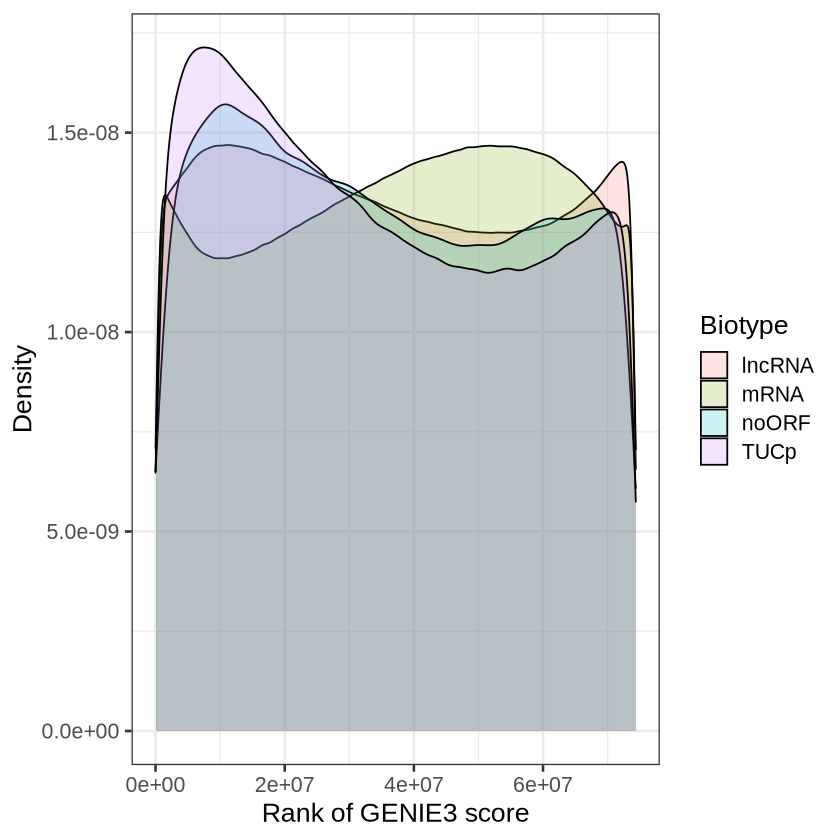

In [8]:
ggplot()+ geom_density(data=GENIE3_sorted,aes(x=Rank,y = after_stat(density), fill=Biotype),alpha=.2)+labs(x = "Rank of GENIE3 score",
       y = "Density")

Warning message:
“Removed 68424409 rows containing non-finite outside the scale range
(`stat_density()`).”


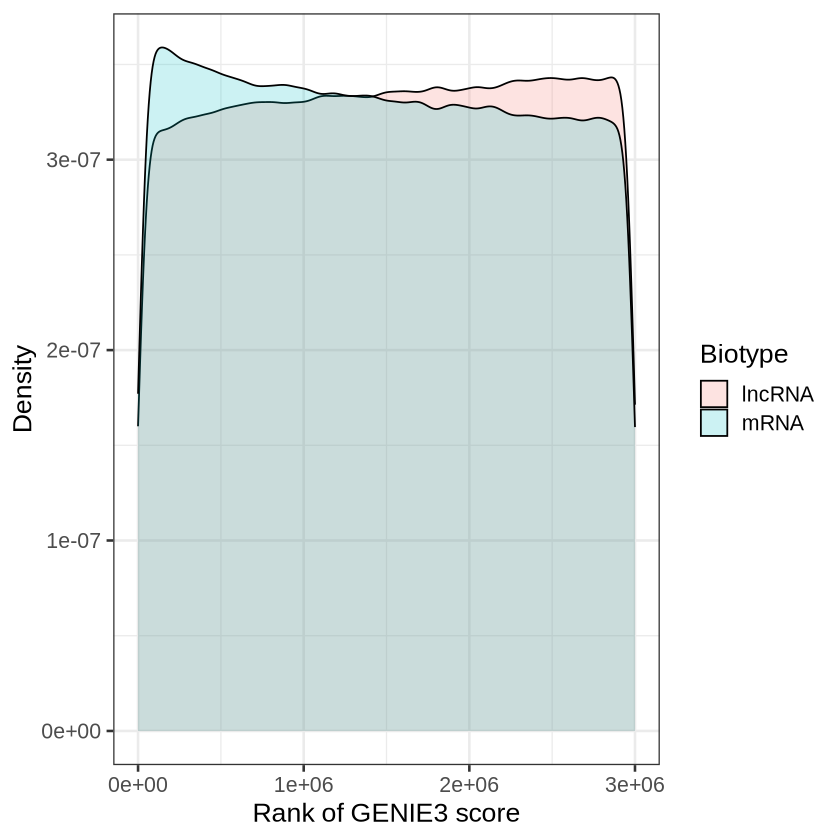

In [12]:
#zoom
ggplot()+ geom_density(data = subset(GENIE3_sorted, Biotype %in% c("mRNA", "lncRNA")),aes(x=Rank,y = after_stat(density), fill=Biotype),alpha=.2)+labs(x = "Rank of GENIE3 score",
       y = "Density") + xlim(0,3000000)